## Observations and Insights 

In [145]:
#Three Observations from the dataset:
#1 - the gender distribution of male and female mice in this study was nearly even (50.4% male, 49.6% female)
#2 - tumor volume (mm3) decreased over time (based on timepoint) for mice involved in the Capomulin study on average
#3 - the correlation between average mouse weight (g) and average tumor volume (mm3) is 0.84 for the Capomulin drug regimen



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata
#study_results

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_df
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(merge_df['Mouse ID'].value_counts())
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_clean = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
merge_df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = len(merge_df_clean['Mouse ID'].value_counts())
clean_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_drug_df = merge_df_clean.groupby(['Drug Regimen'])
grouped_drug_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grp_mean = grouped_drug_df.mean()
drug_grp_mean.head(30)

drug_grp_mean = drug_grp_mean.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_mean['Tumor Volume (mean)'] = drug_grp_mean
drug_grp_mean.head(10)




C:\Users\rober\AppData\Local\Temp/ipykernel_12628/2626415945.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_mean = drug_grp_mean.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (mean)
Drug Regimen,,
Capomulin,40.675741,40.675741
Ceftamin,52.591172,52.591172
Infubinol,52.884795,52.884795
Ketapril,55.235638,55.235638
Naftisol,54.331565,54.331565
Placebo,54.033581,54.033581
Propriva,52.320930,52.320930
Ramicane,40.216745,40.216745
Stelasyn,54.233149,54.233149


In [26]:
drug_grp_mean = drug_grp_mean.drop('Tumor Volume (mm3)', 1)
drug_grp_mean.head(10)
# Assemble the resulting series into a single summary dataframe.

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/3707249130.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_mean = drug_grp_mean.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (mean)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [27]:
drug_grp_median = grouped_drug_df.median()
drug_grp_median.head(30)

drug_grp_median = drug_grp_median.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_median['Tumor Volume (median)'] = drug_grp_median
drug_grp_median.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/34068961.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_median = drug_grp_median.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (median)
Drug Regimen,,
Capomulin,41.557809,41.557809
Ceftamin,51.776157,51.776157
Infubinol,51.820584,51.820584
Ketapril,53.698743,53.698743
Naftisol,52.509285,52.509285
Placebo,52.288934,52.288934
Propriva,50.446266,50.446266
Ramicane,40.673236,40.673236
Stelasyn,52.431737,52.431737


In [28]:
drug_grp_median = drug_grp_median.drop('Tumor Volume (mm3)', 1)
drug_grp_median.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/2316007226.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_median = drug_grp_median.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (median)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [29]:
drug_grp_variance = grouped_drug_df.var()
drug_grp_variance.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [30]:
drug_grp_variance = drug_grp_variance.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_variance['Tumor Volume (variance)'] = drug_grp_variance
drug_grp_variance.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/938908126.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_variance = drug_grp_variance.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (variance)
Drug Regimen,,
Capomulin,24.947764,24.947764
Ceftamin,39.290177,39.290177
Infubinol,43.128684,43.128684
Ketapril,68.553577,68.553577
Naftisol,66.173479,66.173479
Placebo,61.168083,61.168083
Propriva,43.852013,43.852013
Ramicane,23.486704,23.486704
Stelasyn,59.450562,59.450562


In [31]:
drug_grp_variance = drug_grp_variance.drop('Tumor Volume (mm3)', 1)
drug_grp_variance.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/1453200890.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_variance = drug_grp_variance.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (variance)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [32]:
drug_grp_stddev = grouped_drug_df.std()
drug_grp_stddev.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,6.946341,1.712891,13.676648,6.622085,1.106484
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [33]:
drug_grp_stddev = drug_grp_stddev.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_stddev['Tumor Volume (standard deviation)'] = drug_grp_stddev
drug_grp_stddev.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/2165014511.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_stddev = drug_grp_stddev.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (standard deviation)
Drug Regimen,,
Capomulin,4.994774,4.994774
Ceftamin,6.268188,6.268188
Infubinol,6.567243,6.567243
Ketapril,8.279709,8.279709
Naftisol,8.134708,8.134708
Placebo,7.821003,7.821003
Propriva,6.622085,6.622085
Ramicane,4.846308,4.846308
Stelasyn,7.710419,7.710419


In [34]:
drug_grp_stddev = drug_grp_stddev.drop('Tumor Volume (mm3)', 1)
drug_grp_stddev.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/1056662417.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_stddev = drug_grp_stddev.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (standard deviation)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [35]:
drug_grp_sem = grouped_drug_df.sem()
drug_grp_sem.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.509136,0.180169,0.948518,0.329346,0.055981
Ceftamin,0.604977,0.118535,1.070629,0.469821,0.088766
Infubinol,0.562919,0.163684,1.009879,0.492236,0.076985
Ketapril,0.439030,0.134333,1.023238,0.603860,0.101659
Naftisol,0.492430,0.109930,1.040081,0.596466,0.089200
Placebo,0.472356,0.136615,1.032495,0.581331,0.099514
Propriva,0.570986,0.140799,1.124214,0.544332,0.090952
Ramicane,0.393825,0.214244,0.945433,0.320955,0.045780
Stelasyn,0.590143,0.122169,1.028921,0.573111,0.072252


In [36]:
drug_grp_sem = drug_grp_sem.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1) 
drug_grp_sem['Tumor Volume (SEM)'] = drug_grp_sem
drug_grp_sem.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/177775901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_sem = drug_grp_sem.drop(['Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 1)


,Tumor Volume (mm3),Tumor Volume (SEM)
Drug Regimen,,
Capomulin,0.329346,0.329346
Ceftamin,0.469821,0.469821
Infubinol,0.492236,0.492236
Ketapril,0.603860,0.603860
Naftisol,0.596466,0.596466
Placebo,0.581331,0.581331
Propriva,0.544332,0.544332
Ramicane,0.320955,0.320955
Stelasyn,0.573111,0.573111


In [37]:
drug_grp_sem = drug_grp_sem.drop('Tumor Volume (mm3)', 1)
drug_grp_sem.head(10)

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/176327389.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_grp_sem = drug_grp_sem.drop('Tumor Volume (mm3)', 1)


,Tumor Volume (SEM)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [38]:
meanmed_df = pd.merge(drug_grp_mean, drug_grp_median, on="Drug Regimen", how="outer")
meanmed_df

,Tumor Volume (mean),Tumor Volume (median)
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [39]:
varstd_df = pd.merge(drug_grp_variance, drug_grp_stddev, on="Drug Regimen", how="outer")
varstd_df

,Tumor Volume (variance),Tumor Volume (standard deviation)
Drug Regimen,,
Capomulin,24.947764,4.994774
Ceftamin,39.290177,6.268188
Infubinol,43.128684,6.567243
Ketapril,68.553577,8.279709
Naftisol,66.173479,8.134708
Placebo,61.168083,7.821003
Propriva,43.852013,6.622085
Ramicane,23.486704,4.846308
Stelasyn,59.450562,7.710419


In [40]:
varstdsem_df = pd.merge(varstd_df, drug_grp_sem, on="Drug Regimen", how="outer")
varstdsem_df

,Tumor Volume (variance),Tumor Volume (standard deviation),Tumor Volume (SEM)
Drug Regimen,,,
Capomulin,24.947764,4.994774,0.329346
Ceftamin,39.290177,6.268188,0.469821
Infubinol,43.128684,6.567243,0.492236
Ketapril,68.553577,8.279709,0.603860
Naftisol,66.173479,8.134708,0.596466
Placebo,61.168083,7.821003,0.581331
Propriva,43.852013,6.622085,0.544332
Ramicane,23.486704,4.846308,0.320955
Stelasyn,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.merge(meanmed_df, varstdsem_df, on="Drug Regimen", how="outer")
summary_table

,Tumor Volume (mean),Tumor Volume (median),Tumor Volume (variance),Tumor Volume (standard deviation),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = grouped_drug_df.count()
timepoint_df.head(30)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [43]:
timepoint_df = timepoint_df.drop(['Mouse ID','Sex','Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], 1) 
timepoint_df

C:\Users\rober\AppData\Local\Temp/ipykernel_12628/13546232.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  timepoint_df = timepoint_df.drop(['Mouse ID','Sex','Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'], 1)


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<AxesSubplot:xlabel='Drug Regimen'>

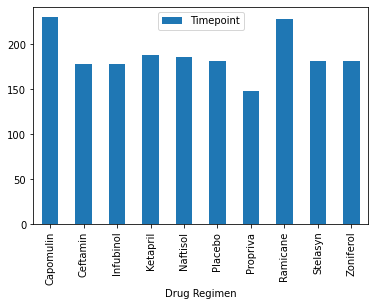

In [44]:
timepoint_df.plot.bar()

In [45]:
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
num_timpoints = [230,178,178,188,186,181,148,228,181,182]

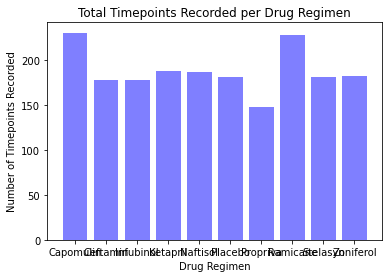

In [46]:
plt.bar(drug_regimen, num_timpoints, color="blue", alpha=0.5, align="center")
plt.title('Total Timepoints Recorded per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints Recorded')
plt.show()

In [47]:
#Determine number of male and female mice taking part in the study
gender_df = merge_df_clean.groupby(['Sex'])
gender_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [48]:
gender_df_unique = gender_df['Mouse ID'].nunique()
gender_df_unique

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

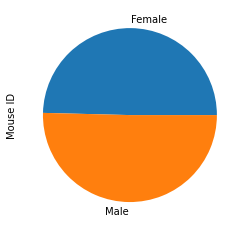

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df_unique.plot.pie()

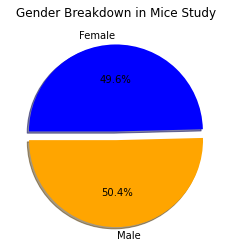

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
total_micestudied = [125, 123]
colors = ["orange", "blue"]
explode = (0.1, 0)

plt.pie(total_micestudied, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Gender Breakdown in Mice Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#merge_df
timepoint_df = merge_df_clean.groupby(['Mouse ID'])['Timepoint'].max()   
timepoint_df = timepoint_df.reset_index()
timepoint_df.head()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = timepoint_df.merge(merge_df_clean,on=['Mouse ID','Timepoint'],how="left")
merged_data.head(30)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
#for drug in drug_treatments
    #if drug merged_data['Drug Regimen']
    #tumor_vol_data.append(['Tumor Volume (mm3)'])

fourdrugs_df = merged_data.loc[(merged_data['Drug Regimen'] == "Capomulin") | (merged_data['Drug Regimen'] == "Ramicane") | (merged_data['Drug Regimen'] == "Infubinol") | (merged_data['Drug Regimen'] == "Ramicane") | (merged_data['Drug Regimen'] == "Ceftamin")]
fourdrugs_df.head()

    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [106]:
tumorvolume_df = fourdrugs_df['Tumor Volume (mm3)']
tumorvolume_df

0      67.973419
1      65.525743
3      62.999356
6      38.407618
7      43.047543
         ...    
238    68.594745
239    31.896238
240    64.729837
244    30.638696
245    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [107]:
quartiles = tumorvolume_df.quantile([.25,.5,.75])
quartiles

0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

In [109]:
lowerq = quartiles[0.25] #defines lower quartile
upperq = quartiles[0.75] #defines upper quartile
iqr = upperq-lowerq #defines interquartile range as a variable
iqr

22.742517952499995

In [110]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr) #sets lower bound for outliers if under
upper_bound = upperq + (1.5*iqr) #sets upper bound for outliers if over
lower_bound

3.0739668737500097

In [111]:
upper_bound

94.04403868374999

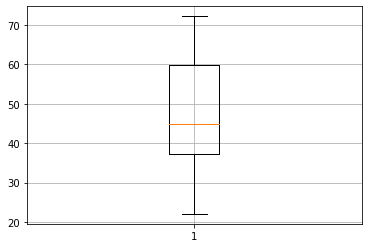

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvolume_df)
plt.grid()
plt.show()

## Line and Scatter Plots

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
individual_mouse_data = merge_df.loc[merge_df["Mouse ID"] == "b128"]
individual_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


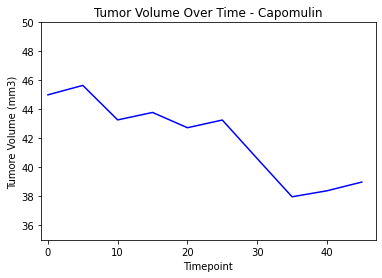

In [126]:
tumorvol_ind = [45, 45.651, 43.271, 43.785, 42.732, 43.262, 40.605, 37.968, 38.380, 38.983]
timepoint_ind = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(timepoint_ind,tumorvol_ind,color="blue",label="Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumore Volume (mm3)")
plt.title("Tumor Volume Over Time - Capomulin")
plt.xlim(-1,47)
plt.ylim(35,50)
plt.show()

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = merge_df_clean.loc[(merge_df_clean['Drug Regimen'] == "Capomulin")]
capomulin_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [133]:
#capomulin_avg_df = capomulin_df.mean()
#capomulin_avg_df
capomulin_grouped = capomulin_df.groupby(['Mouse ID'])
capomulin_grouped.head()
# mean
capomulin_avg_df = capomulin_grouped.mean()
capomulin_avg_df.head(30)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [134]:
capo_tumor_avg = capomulin_avg_df['Tumor Volume (mm3)']
capo_tumor_avg

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [135]:
capo_weight_avg = capomulin_avg_df['Weight (g)']
capo_weight_avg

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

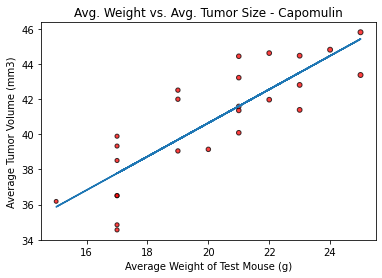

In [148]:
plt.scatter(capo_weight_avg, capo_tumor_avg, marker="o", facecolors="red", edgecolors="black",
            s=capo_weight_avg, alpha=0.75)
plt.title("Avg. Weight vs. Avg. Tumor Size - Capomulin")
plt.xlabel("Average Weight of Test Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
m, b = np.polyfit(capo_weight_avg, capo_tumor_avg, 1)
plt.plot(x, m*x+b)
plt.show()

## Correlation and Regression

In [141]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_weight_avg,capo_tumor_avg)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


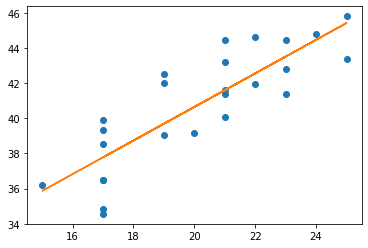

In [147]:
#x = capo_weight_avg
#y = capo_tumor_avg
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)